## Data Description

The data used in this work is credited to the work carried away by P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

This data has to do with a red wine quality of a Portuguese "Vinho Verde" wine and comprises physicochemical properties of the wine. These characteristics were obtained from May/2004 to February/2007 when samples were tested at the official certification entity - CVRVV - whose goal is to improve the quality and marketing of vinho verde.
It is composed by 1599 entries, each row being a diferent wine sample and each collumn being a physicochemical test performed on the sample, having a total of 11 tests performed. There is a 12th collumn, which corresponds to the final rating the wine received. Details on the data and its purposes can be found at [Cortez et al., 2009].

The phisicochemical tests are:
- Fixed acidity (mg/L): Acids are a major component of wine. Fixed acids are the acids that originally produced in the grape or later during the fermentation process by yeast, and therefore nonvolatile. These are tartaric, malic, citric (all produced by the grape) and succinic (by the yeast). Type: double;
- Volatile acidity (mg/L): These are the acids formed as a byproduct of fermentation and are released as steam. It is almost only acetic acid but it can also be lactic, formic, butyric, and propionic acids. Type: double;
- Citric acid (mg/L): An organic weak acid and therefore used to preserve the wine and stop microbial and mold activity. Can also be added to increase the acidity of flavor of the wine. Type: double;
- Residual sugar (g/L): Residual sugars refer to the natural sugars present in grapes (glucose, fructose) that remain in the wine even after fermentation takes place. Type: double;
- Chlorides (g/L): Chlorides are eletrolytes and can therefore help reducing wine acidity. Type: double;
- Free sulfur dioxide (mg/L): Used to calculate the amount of sulfur dioxide used, it is the sulfur dioxide that did not bind with any other molecule. Type: double;
- Total sulfur dioxide (mg/L): Sulfur dioxide is used throughout winemaking stages to prevent oxidation and microbial growth;
- Density (g/mL): Mass per volume of wine, used to estimate the quality of the wine. Type: double;
- pH: Measures the acidity of the wine in the pH scale. All wines lie on the acidic range (2.5-4.5). Type: double;
- Sulphates (g/L): This should be sulfites and not sulphates, as the firsts are not used in wine making. Sulfites occurr naturaly in grapes and act as a preservative by inhibiting microbial growth. Type: double;
- Alcohol (%): Percentage of alcohol per volume, the direct product of fermentation. Type: double;

The last feature, corresponding to the rating, was obtained by using at least three sensory assessors (using blind tastes) which attributed a rating from 0 (very bad) to 10 (excellent). The final rating is the average of the ratings. The type of this feature is therefore, int. 

## Data Analysis

In [29]:
library(e1071)
library(ggplot2)
library(purrr)
library(tidyr)
library(reshape)
library(FSA)
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:reshape':

    rename

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [2]:
data = read.csv('winequality-red.csv')

In [15]:
head(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5


## Univariate analysis  

### Descriptive statistics 

### Position

Mean:

In [19]:
colMeans(data)

fixed.acidity     volatile.acidity          citric.acid 
          8.31963727           0.52782051           0.27097561 
      residual.sugar            chlorides  free.sulfur.dioxide 
          2.53880550           0.08746654          15.87492183 
total.sulfur.dioxide              density                   pH 
         46.46779237           0.99674668           3.31111320 
           sulphates              alcohol              quality 
          0.65814884          10.42298311           5.63602251

In [20]:
colMeans(data)[1]

fixed.acidity 
     8.319637

barplot com mean vs trimmed mean vs median para cada var. a célula de cima foi só experiência, ainda tenho que ver como se faz

Trimmed mean (10%)

In [15]:
sapply(data, mean, trim = 0.1)

fixed.acidity     volatile.acidity          citric.acid 
          8.15253708           0.51806792           0.26128806 
      residual.sugar            chlorides  free.sulfur.dioxide 
          2.25835285           0.08023497          14.57728337 
total.sulfur.dioxide              density                   pH 
         41.84309133           0.99673621           3.30909446 
           sulphates              alcohol              quality 
          0.63744731          10.31003123           5.58860265

Median:

In [7]:
sapply(data, median)

fixed.acidity     volatile.acidity          citric.acid 
             7.90000              0.52000              0.26000 
      residual.sugar            chlorides  free.sulfur.dioxide 
             2.20000              0.07900             14.00000 
total.sulfur.dioxide              density                   pH 
            38.00000              0.99675              3.31000 
           sulphates              alcohol              quality 
             0.62000             10.20000              6.00000

Standard deviation:

In [8]:
sapply(data, sd)

fixed.acidity     volatile.acidity          citric.acid 
         1.741096318          0.179059704          0.194801137 
      residual.sugar            chlorides  free.sulfur.dioxide 
         1.409928060          0.047065302         10.460156970 
total.sulfur.dioxide              density                   pH 
        32.895324478          0.001887334          0.154386465 
           sulphates              alcohol              quality 
         0.169506980          1.065667582          0.807569440

Min and Max of every variable:

In [9]:
sapply(data, range)

fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
4.6,0.12,0,0.9,0.012,1,6,0.99007,2.74,0.33,8.4,3
15.9,1.58,1,15.5,0.611,72,289,1.00369,4.01,2.00,14.9,8


Interquartile Range

In [36]:
sapply(data, IQR)

fixed.acidity     volatile.acidity          citric.acid 
            2.100000             0.250000             0.330000 
      residual.sugar            chlorides  free.sulfur.dioxide 
            0.700000             0.020000            14.000000 
total.sulfur.dioxide              density                   pH 
           40.000000             0.002235             0.190000 
           sulphates              alcohol              quality 
            0.180000             1.600000             1.000000

Kurtosis:

In [12]:
sapply(data, kurtosis)

fixed.acidity     volatile.acidity          citric.acid 
           1.1196987            1.2126893           -0.7930455 
      residual.sugar            chlorides  free.sulfur.dioxide 
          28.4850200           41.5259635            2.0072212 
total.sulfur.dioxide              density                   pH 
           3.7856764            0.9225000            0.7959191 
           sulphates              alcohol              quality 
          11.6615285            0.1916586            0.2879148

Skewness:

In [13]:
sapply(data, skewness)

fixed.acidity     volatile.acidity          citric.acid 
          0.98090840           0.67033307           0.31774029 
      residual.sugar            chlorides  free.sulfur.dioxide 
          4.53213992           5.66969370           1.24822199 
total.sulfur.dioxide              density                   pH 
          1.51268904           0.07115397           0.19332027 
           sulphates              alcohol              quality 
          2.42411764           0.85921442           0.21739311

alguns plots, ver se se mantém algo

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


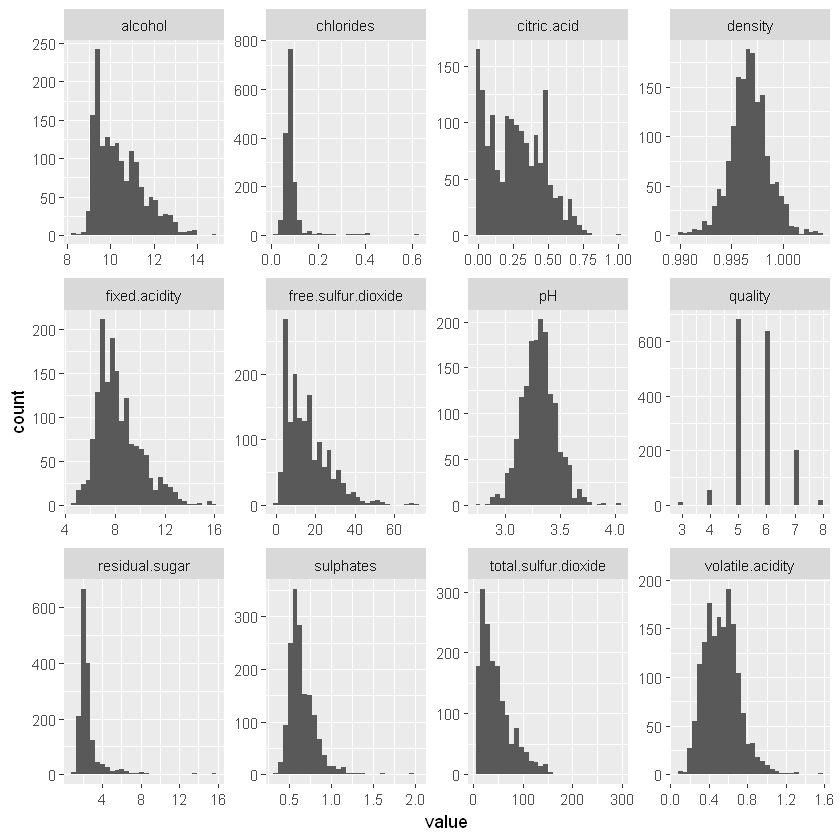

In [19]:
data %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_histogram()

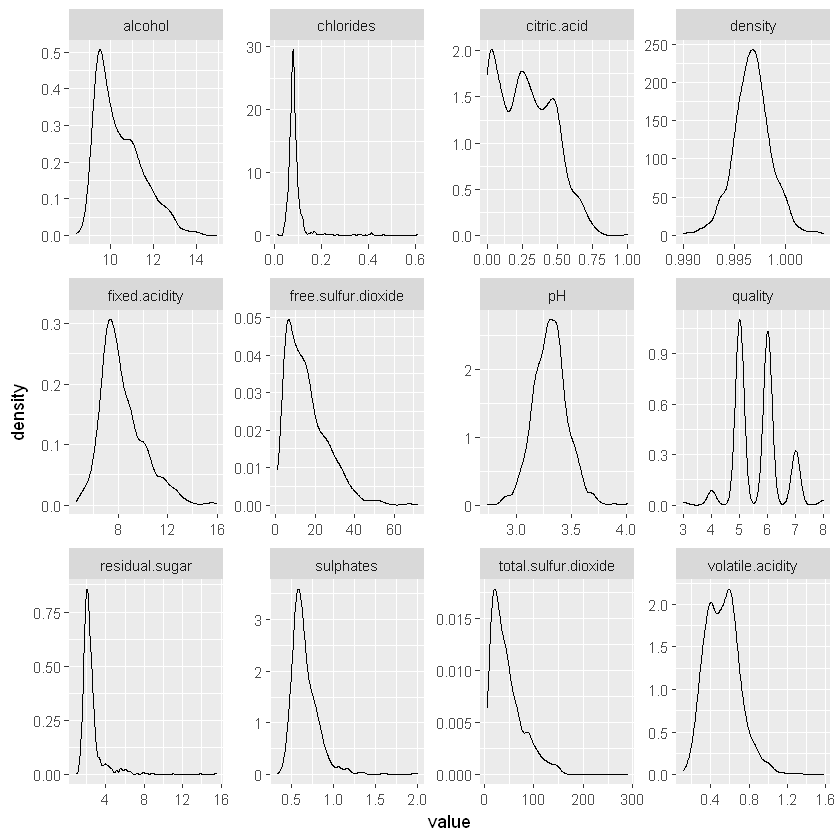

In [20]:
data %>%
  gather() %>% 
  ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") +
    geom_density()

Using  as id variables


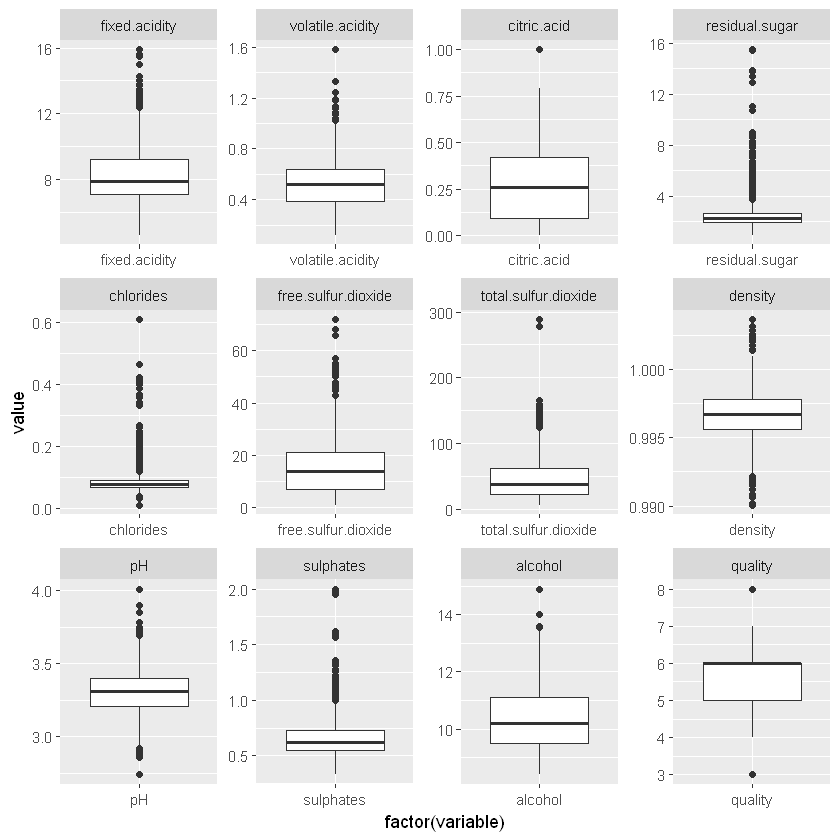

In [25]:
melt_data <- melt(data)
    ggplot(melt_data, aes(factor(variable), value)) + geom_boxplot() + facet_wrap(~variable, scale="free")

Correlation matrix

In [38]:
cor(data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00000000,-0.256130895,0.67170343,0.114776724,0.093705186,-0.153794193,-0.11318144,0.66804729,-0.68297819,0.183005664,-0.06166827,0.12405165
volatile.acidity,-0.25613089,1.000000000,-0.55249568,0.001917882,0.061297772,-0.010503827,0.07647000,0.02202623,0.23493729,-0.260986685,-0.20228803,-0.39055778
citric.acid,0.67170343,-0.552495685,1.00000000,0.143577162,0.203822914,-0.060978129,0.03553302,0.36494718,-0.54190414,0.312770044,0.10990325,0.22637251
residual.sugar,0.11477672,0.001917882,0.14357716,1.000000000,0.055609535,0.187048995,0.20302788,0.35528337,-0.08565242,0.005527121,0.04207544,0.01373164
chlorides,0.09370519,0.061297772,0.20382291,0.055609535,1.000000000,0.005562147,0.04740047,0.20063233,-0.26502613,0.371260481,-0.22114054,-0.12890656
free.sulfur.dioxide,-0.15379419,-0.010503827,-0.06097813,0.187048995,0.005562147,1.000000000,0.66766645,-0.02194583,0.07037750,0.051657572,-0.06940835,-0.05065606
total.sulfur.dioxide,-0.11318144,0.076470005,0.03553302,0.203027882,0.047400468,0.667666450,1.00000000,0.07126948,-0.06649456,0.042946836,-0.20565394,-0.18510029
density,0.66804729,0.022026232,0.36494718,0.355283371,0.200632327,-0.021945831,0.07126948,1.00000000,-0.34169933,0.148506412,-0.49617977,-0.17491923
pH,-0.68297819,0.234937294,-0.54190414,-0.085652422,-0.265026131,0.070377499,-0.06649456,-0.34169933,1.00000000,-0.196647602,0.20563251,-0.05773139
sulphates,0.18300566,-0.260986685,0.31277004,0.005527121,0.371260481,0.051657572,0.04294684,0.14850641,-0.19664760,1.000000000,0.09359475,0.25139708


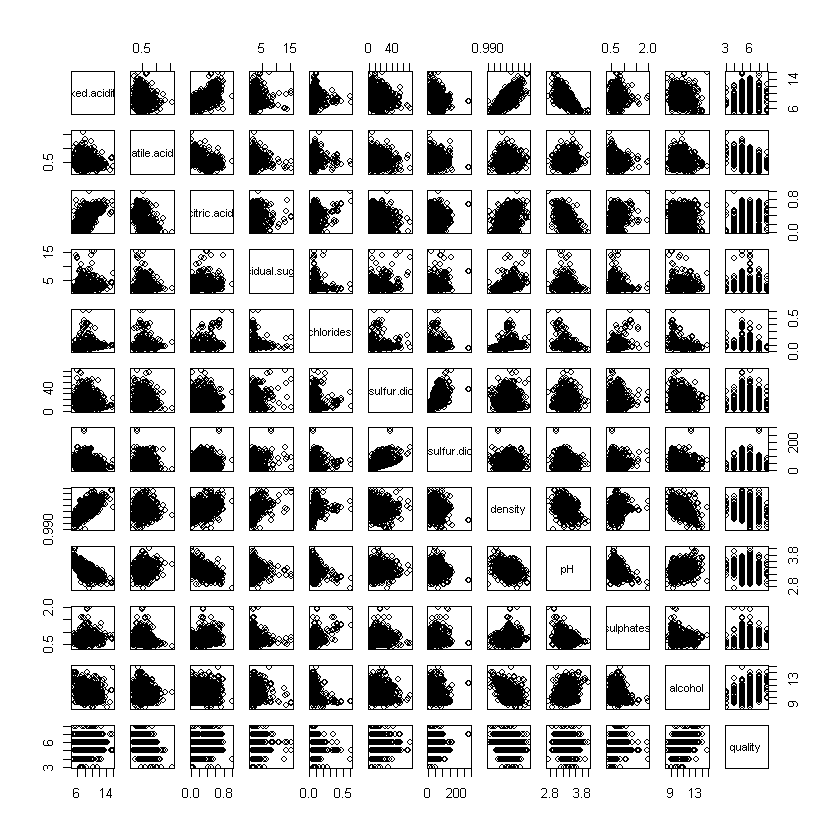

In [39]:
pairs(data)